In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('ds_salaries.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
data.head(15)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [5]:
data.shape

(607, 12)

<AxesSubplot:xlabel='salary_in_usd'>

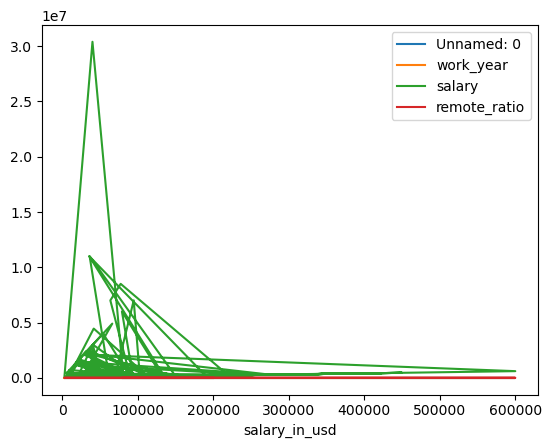

In [6]:
data.plot("salary_in_usd")

In [7]:
X=pd.get_dummies(data,columns=['employment_type','experience_level'],drop_first=True) 

X.head()

,Unnamed: 0,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE
0,0,2020,Data Scientist,70000,EUR,79833,DE,0,DE,L,0,1,0,0,1,0
1,1,2020,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,0,1,0,0,0,1
2,2,2020,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,0,1,0,0,0,1
3,3,2020,Product Data Analyst,20000,USD,20000,HN,0,HN,S,0,1,0,0,1,0
4,4,2020,Machine Learning Engineer,150000,USD,150000,US,50,US,L,0,1,0,0,0,1


In [8]:
x=X.select_dtypes(exclude='object')

In [9]:
x

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE
0,0,2020,70000,79833,0,0,1,0,0,1,0
1,1,2020,260000,260000,0,0,1,0,0,0,1
2,2,2020,85000,109024,50,0,1,0,0,0,1
3,3,2020,20000,20000,0,0,1,0,0,1,0
4,4,2020,150000,150000,50,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,154000,154000,100,0,1,0,0,0,1
603,603,2022,126000,126000,100,0,1,0,0,0,1
604,604,2022,129000,129000,0,0,1,0,0,0,1
605,605,2022,150000,150000,100,0,1,0,0,0,1


In [10]:
x.reset_index(drop=True,inplace=True)
data_train=x.loc[0:499]

In [11]:
data_test=x.loc[500:].drop(['salary_in_usd'],axis=1)

In [12]:
data_train

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE
0,0,2020,70000,79833,0,0,1,0,0,1,0
1,1,2020,260000,260000,0,0,1,0,0,0,1
2,2,2020,85000,109024,50,0,1,0,0,0,1
3,3,2020,20000,20000,0,0,1,0,0,1,0
4,4,2020,150000,150000,50,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
495,495,2022,153000,153000,50,0,1,0,0,1,0
496,496,2022,52800,58035,100,0,1,0,0,0,0
497,497,2022,165000,165000,100,0,1,0,0,0,1
498,498,2022,85000,93427,50,0,1,0,0,0,1


In [13]:
X=data_train.drop(['salary_in_usd'],axis=1)
y=data_train['salary_in_usd']

In [14]:
y

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
495    153000
496     58035
497    165000
498     93427
499     52396
Name: salary_in_usd, Length: 500, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split as tts 

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 10), (100, 10), (400,), (100,))

In [16]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()
linreg.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred=linreg.predict(X_test)
y_pred.max()

266956.7612134814

In [18]:
from sklearn.metrics import mean_squared_error as mse  
y_pred=linreg.predict(X_test)

mse(y_test, y_pred, squared=False)

61854.86584499803

In [19]:
y_pred

array([ 89849.49907596, 147573.49536279,  90214.77259068, 139467.83687775,
        90786.47079648,   9707.69108047,  93046.57019395, 127829.67367044,
       144215.76283114, 150173.04355641, 121416.25052994, 142930.55430634,
        89671.03797941, 142721.31609994,  68993.09942377, 138577.57620851,
        87218.37146785, 143258.28611705, 266956.76121348,  93765.63097516,
        96466.81428382, 129491.55744306,  89055.98758795, 204072.98846103,
       143986.72256117, 143547.75291342,  50808.35762218, 127805.9490058 ,
        90239.76028101,  84160.02945263, 145025.47118734, 188342.16082852,
        89497.38492497,  83755.58531768,  59266.30400422,  59521.50956394,
       140971.13610337, 140122.08957336,  77101.72884533,  78666.52948414,
        76574.12174193,   8328.05924835, 137617.99206804,  86795.60315342,
       141079.70598764, 140667.81932473, 145626.23346669,  91323.67214683,
        86821.93050941,  51060.38773897,  90353.52295657,  95681.51089229,
        90375.67637119, 1

In [20]:
residuals = y_pred - y_test

(array([ 1.,  0.,  0.,  1.,  4., 10., 29., 40., 13.,  2.]),
 array([-338959.58458714, -288867.95000708, -238776.31542702,
        -188684.68084695, -138593.04626689,  -88501.41168683,
         -38409.77710677,   11681.85747329,   61773.49205336,
         111865.12663342,  161956.76121348]),
 <BarContainer object of 10 artists>)

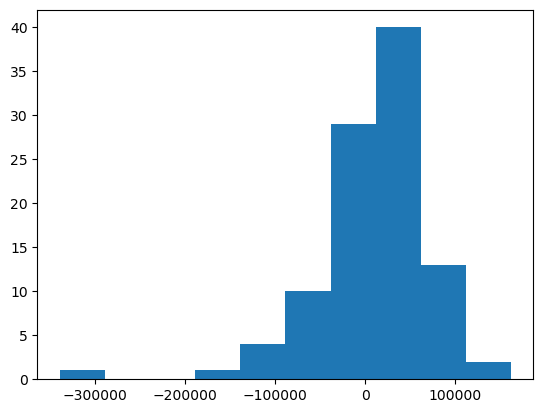

In [21]:
plt.hist(residuals)

In [28]:
from functions import *
X.columns

Index(['Unnamed: 0', 'work_year', 'salary', 'remote_ratio',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE'],
      dtype='object')

In [32]:
X2= X[['Unnamed: 0', 'work_year', 'remote_ratio',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE']].astype('int')

In [33]:
summary_regression_model(X2,y)

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     20.20
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           5.75e-29
Time:                        17:42:48   Log-Likelihood:                -6219.5
No. Observations:                 500   AIC:                         1.246e+04
Df Residuals:                     490   BIC:                         1.250e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.357e+06   1

In [30]:
report_pd(X2, False)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]